# Computation of the glass transition temperature

The implemented method is based on the work of Patrone *et al* (P.N. Patrone, A. Dienstfrey, A.R. Browning, S. Tucker, S. Christensen "Uncertainty Quantification in Molecular Dynamics Studies of the Glass Transition Temperature" Polymer 87 (2016) 246-259). It assumes that a single hyberpola, as defined by Eq. (1) in Patrone *et al* and shown below, fits density vs temperature data for the entire temperature range.

$\rho \left(T \right) = \rho_0 - \alpha \left( T - T_0 \right) -\beta H\left(T, T_0, \gamma \right)$

$H\left(T, T_0, \gamma \right) = \frac{1}{2} \left( T - T_0 \right) + \sqrt{\frac{\left( T - T_0 \right)^2}{4} + \exp(\gamma)}$

The current implementation requires the numpy, scipy and matplotlib modules to be installed.

In [5]:
%matplotlib inline

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

The user has to specify two input parameters in the cell below. The first one is a string with the full path and name of an ASCII file which contains the temperature-density or temperature-specific volume data. The file is expected to have two columns, the first one is the temperature in Kelvin and the second one is the density or the specific volume. Note that the actual units of the density or specific volume are not important. The first line of the file is ignored as it is assumed to be a comment line. The second input parameter is a boolean named "density_flag" which specifies if the supplied data are for density (in this case it is true) or for specific volume (in this case it is false).

In [6]:
filename = "" # the full path and name of the data with the actual data to fit
density_flag = True # True if the data are for density - False if the data are for specific volume

The <span style="font-family:Consolas"> density_hyperbola </span> function defined below is a helper function for fitting of the data. It codes the hyperbola defined previously.

In [7]:
def density_hyperbola(x, rho0, t0, alpha, bita, gamma):
    dT = x - t0
    H0 = 0.5 * dT + np.sqrt(0.25 * dT * dT + np.exp(gamma))
    rho = rho0 - alpha * dT - bita * H0
    return rho

This step performs the actual fitting of the hyperbola to the provided data using the Levenberg-Marquardt algorithm. The input density vs temperature data as well as the predicted values are shown in a plot. The predicted glass transition temperature and the values of all parameters are also printed.

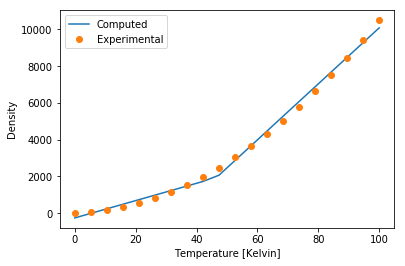

The predicted Tg value is 46.4912 Kelvin
The values of the parameters are: 
        ρ_0: 1932.4404
        α: -47.1053
        β: -105.2632
        γ: -87.1231


In [8]:
temperature, measurement = np.loadtxt(filename, skiprows=1, unpack=True)

# convert data for specific volume into data for density
if density_flag:
    density = measurement
else:
    density = 1.0/measurement

# perform the fitting using the hyperbola function
param, param_cov = curve_fit(density_hyperbola, temperature, density)

# plot the final results
plt.plot(temperature, density_hyperbola(temperature, param[0], param[1], param[2], param[3], param[4]), label="Computed")
plt.plot(temperature, density, "o", label="Experimental")
plt.ylabel("Density")
plt.xlabel("Temperature [Kelvin]")
plt.legend()
plt.show()

# print the values of the parameters and the actual Tg
print(f"The predicted Tg value is {param[1]:.4f} Kelvin")
print(f"The values of the parameters are: \n\
        \N{GREEK SMALL LETTER RHO}_0: {param[0]:.4f}\n\
        \N{GREEK SMALL LETTER ALPHA}: {param[2]:.4f}\n\
        \N{GREEK SMALL LETTER BETA}: {param[3]:.4f}\n\
        \N{GREEK SMALL LETTER GAMMA}: {param[4]:.4f}")